# Heatmap Basic with Seaborn Example

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
# read file
df = pd.read_csv('Foreign_Exchange_Rates.csv', 
                 usecols=[1,7], names=['DATE', 'CAD_USD'], 
                 skiprows=1, index_col=0, parse_dates=[0])

In [3]:
df.head()

,CAD_USD
DATE,
2000-01-03,1.4465
2000-01-04,1.4518
2000-01-05,1.4518
2000-01-06,1.4571
2000-01-07,1.4505


In [4]:
df['CAD_USD'] = pd.to_numeric(df.CAD_USD, errors='coerce')
df.dropna(inplace=True)

In [5]:
# create a copy of the dataframe, and add columns for month and year
df_m = df.copy()
df_m['month'] = [i.month for i in df_m.index]
df_m['year'] = [i.year for i in df_m.index]
# group by month and year, get the average
df_m = df_m.groupby(['month', 'year']).mean()

In [7]:
df_m.head()

CAD_USD
month year          
1     2000  1.448600
      2001  1.503200
      2002  1.599714
      2003  1.541448
      2004  1.295755

In [8]:
df_m = df_m.unstack(level=0)

In [9]:
df_m.head()

CAD_USD                                                              \
month        1         2         3         4         5         6         7    
year                                                                          
2000   1.448600  1.451210  1.460774  1.468875  1.495736  1.477045  1.477785   
2001   1.503200  1.521563  1.558741  1.557767  1.541050  1.524538  1.530790   
2002   1.599714  1.596400  1.587743  1.581486  1.550155  1.531840  1.545550   
2003   1.541448  1.512147  1.476081  1.458205  1.383957  1.352510  1.382091   
2004   1.295755  1.329895  1.328578  1.341973  1.378860  1.357841  1.322505   

                                                         
month        8         9         10        11        12  
year                                                     
2000   1.482813  1.486430  1.512476  1.542638  1.521875  
2001   1.539857  1.567939  1.571677  1.592245  1.578755  
2002   1.569418  1.576135  1.578009  1.571453  1.559219  
2003   1.396271  1.363371  1.322095  1.313044  1.312755  
2004   1.312677  1.288095  1.246935  1.196770  1.218883

이렇게 pivot을 해버리네 

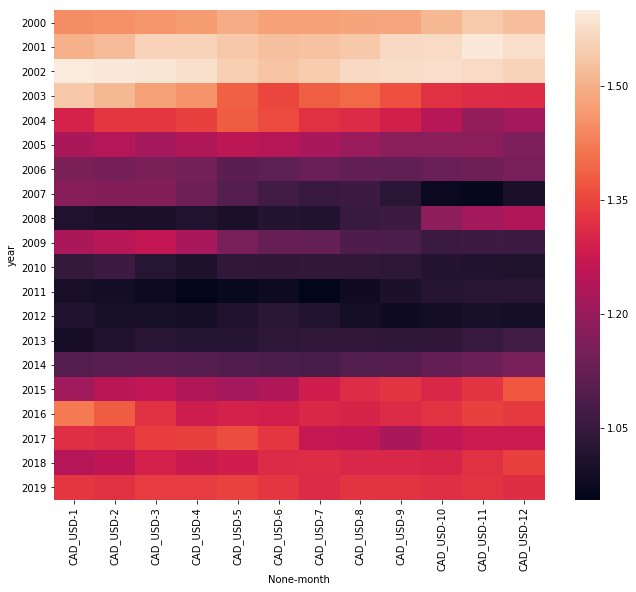

In [14]:
fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(df_m)
plt.show()

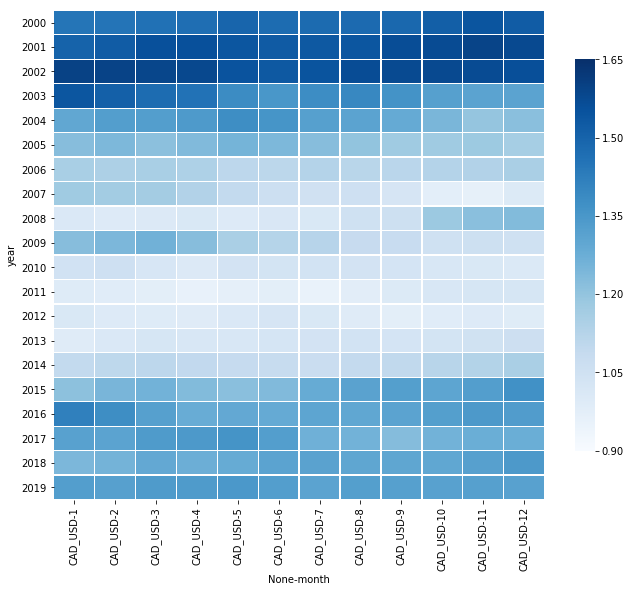

In [15]:
fig, ax = plt.subplots(figsize=(11, 9))
# plot heatmap
sb.heatmap(df_m, cmap="Blues", vmin= 0.9, vmax=1.65,
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()

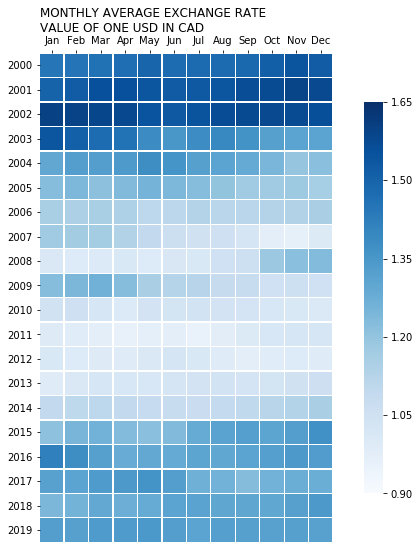

In [23]:
# figure
fig, ax = plt.subplots(figsize=(11, 9))
# plot heatmap
sb.heatmap(df_m, cmap="Blues", vmin= 0.9, vmax=1.65, square=True,
           linewidth=0.3, cbar_kws={"shrink": .8})
# xticks
ax.xaxis.tick_top()
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, xticks_labels)
# axis labels
plt.xlabel('')
plt.ylabel('')
# title
title = 'monthly Average exchange rate\nValue of one USD in CAD\n'.upper()
plt.title(title, loc='left')
plt.show()

## Correlation Matrix

In [29]:
# read dataset
df = pd.read_csv('cereal.csv')

In [28]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [30]:
# get correlations
df_corr = df.corr()
# irrelevant fields
fields = ['rating', 'shelf', 'cups', 'weight']
# drop rows
df_corr.drop(fields, inplace=True)
# drop cols
df_corr.drop(fields, axis=1, inplace=True)

In [31]:
df_corr.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243


### Masks? - 이하에서 그림 형태 잡으려고 Mask잡구나

In [32]:
np.ones_like(df_corr, dtype=np.bool)

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True]], dtype=bool)

In [33]:
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

In [34]:
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]], dtype=bool)

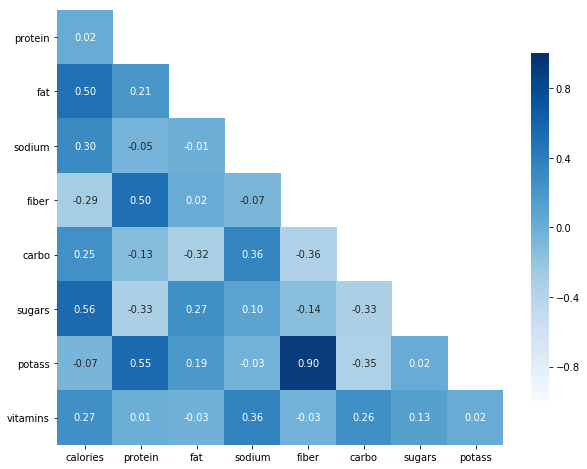

In [35]:
fig, ax = plt.subplots(figsize=(10, 8))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

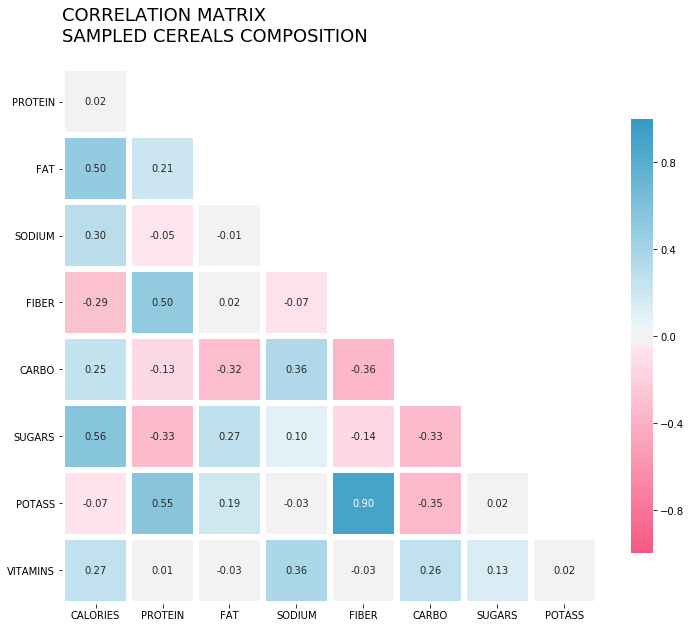

In [37]:
fig, ax = plt.subplots(figsize=(12, 10))
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# color map
cmap = sb.diverging_palette(0, 230, 90, 60, as_cmap=True)
# plot heatmap
sb.heatmap(corr, mask=mask, annot=True, fmt=".2f", 
           linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
           cbar_kws={"shrink": .8}, square=True)
# ticks
yticks = [i.upper() for i in corr.index]
xticks = [i.upper() for i in corr.columns]
plt.yticks(plt.yticks()[0], yticks, rotation=0)
plt.xticks(plt.xticks()[0], xticks)
# title
title = 'CORRELATION MATRIX\nSAMPLED CEREALS COMPOSITION\n'
plt.title(title, loc='left', fontsize=18)
plt.show()

## Density - 특정 두 변수 관계만 확인

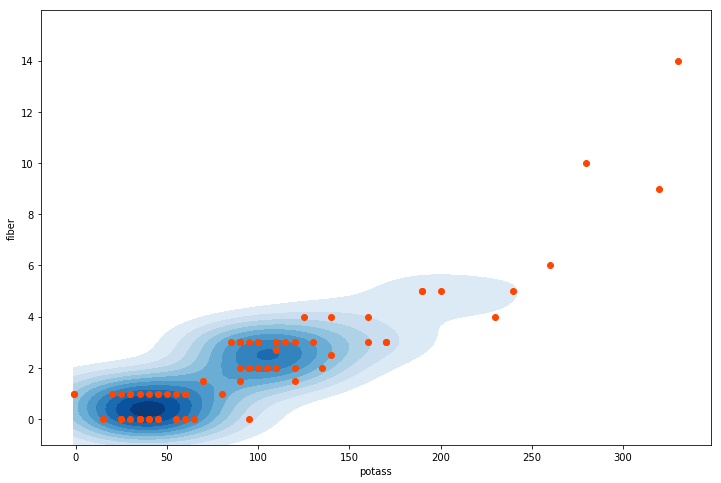

In [40]:
fig, ax = plt.subplots(1, figsize=(12,8))
sb.kdeplot(df.potass, df.fiber, cmap='Blues',
           shade=True, shade_lowest=False, clip=(-1,300))
plt.scatter(df.potass, df.fiber, color='orangered')